In [21]:
import numpy as np
import cv2
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D
from keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import array_to_img
import random,os,glob
import matplotlib.pyplot as plt

# Dataset Input

In [48]:
dir_path = r'C:\Users\yooku\Desktop\FINALYEARPROJECT\input\Garbage classification\Garbage classification'

In [49]:
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))

In [50]:
len(img_list)

2527

# Image Augmentation

In [51]:
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1/255,
                        validation_split=0.1)

train_generator=train.flow_from_directory(dir_path,
                                          target_size=(300,300),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

test_generator=test.flow_from_directory(dir_path,
                                        target_size=(300,300),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')

labels = (train_generator.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [52]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32, 6))

# Writing the labels file

In [55]:
print (train_generator.class_indices)

Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# Building CNN & Saving keras model

In [56]:
model=Sequential()
#Convolution blocks

model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5)) # No accuracy

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5))

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
#model.add(SpatialDropout2D(0.5))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

filepath="trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

# Summarizing our model

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

# Compiling Model using categorical cross entropy loss function & Adam Optimizer

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train

In [59]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=2276//32,
                              validation_data=test_generator,
                              validation_steps=251//32,
                              workers = 4,
                              callbacks=callbacks_list) 

C:\Users\yooku\AppData\Local\Temp/ipykernel_15612/682156912.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
71/71 [==============================] - ETA: 0s - loss: 1.6971 - acc: 0.2464
Epoch 1: val_acc improved from -inf to 0.17411, saving model to trained_model.h5
71/71 [==============================] - 93s 1s/step - loss: 1.6971 - acc: 0.2464 - val_loss: 1.7620 - val_acc: 0.1741
Epoch 2/100
71/71 [==============================] - ETA: 0s - loss: 1.6277 - acc: 0.3128
Epoch 2: val_acc improved from 0.17411 to 0.38839, saving model to trained_model.h5
71/71 [==============================] - 98s 1s/step - loss: 1.6277 - acc: 0.3128 - val_loss: 1.4961 - val_acc: 0.3884
Epoch 3/100
71/71 [==============================] - ETA: 0s - loss: 1.5136 - acc: 0.3561
Epoch 3: val_acc improved from 0.38839 to 0.42857, saving model to trained_model.h5
71/71 [==============================] - 92s 1s/step - loss: 1.5136 - acc: 0.3561 - val_loss: 1.4191 - val_acc: 0.4286
Epoch 4/100
71/71 [==============================] - ETA: 0s - loss: 1.4647 - acc: 0.3730
Epoch 4: val_acc did not improve f

71/71 [==============================] - ETA: 0s - loss: 0.9367 - acc: 0.6627
Epoch 31: val_acc improved from 0.65179 to 0.66071, saving model to trained_model.h5
71/71 [==============================] - 90s 1s/step - loss: 0.9367 - acc: 0.6627 - val_loss: 0.9481 - val_acc: 0.6607
Epoch 32/100
71/71 [==============================] - ETA: 0s - loss: 0.9206 - acc: 0.6693
Epoch 32: val_acc did not improve from 0.66071
71/71 [==============================] - 92s 1s/step - loss: 0.9206 - acc: 0.6693 - val_loss: 1.0390 - val_acc: 0.6250
Epoch 33/100
71/71 [==============================] - ETA: 0s - loss: 0.8774 - acc: 0.6867
Epoch 33: val_acc improved from 0.66071 to 0.68304, saving model to trained_model.h5
71/71 [==============================] - 93s 1s/step - loss: 0.8774 - acc: 0.6867 - val_loss: 0.9045 - val_acc: 0.6830
Epoch 34/100
71/71 [==============================] - ETA: 0s - loss: 0.9019 - acc: 0.6769
Epoch 34: val_acc did not improve from 0.68304
71/71 [=====================

71/71 [==============================] - ETA: 0s - loss: 0.7202 - acc: 0.7411
Epoch 62: val_acc did not improve from 0.73214
71/71 [==============================] - 92s 1s/step - loss: 0.7202 - acc: 0.7411 - val_loss: 0.8214 - val_acc: 0.6875
Epoch 63/100
71/71 [==============================] - ETA: 0s - loss: 0.7546 - acc: 0.7344
Epoch 63: val_acc did not improve from 0.73214
71/71 [==============================] - 93s 1s/step - loss: 0.7546 - acc: 0.7344 - val_loss: 0.8416 - val_acc: 0.6518
Epoch 64/100
71/71 [==============================] - ETA: 0s - loss: 0.7159 - acc: 0.7398
Epoch 64: val_acc did not improve from 0.73214
71/71 [==============================] - 93s 1s/step - loss: 0.7159 - acc: 0.7398 - val_loss: 0.8342 - val_acc: 0.6964
Epoch 65/100
71/71 [==============================] - ETA: 0s - loss: 0.7277 - acc: 0.7438
Epoch 65: val_acc did not improve from 0.73214
71/71 [==============================] - 94s 1s/step - loss: 0.7277 - acc: 0.7438 - val_loss: 0.8345 - v

Epoch 94/100
71/71 [==============================] - ETA: 0s - loss: 0.5885 - acc: 0.7897
Epoch 94: val_acc improved from 0.73214 to 0.73661, saving model to trained_model.h5
71/71 [==============================] - 96s 1s/step - loss: 0.5885 - acc: 0.7897 - val_loss: 0.7301 - val_acc: 0.7366
Epoch 95/100
71/71 [==============================] - ETA: 0s - loss: 0.5610 - acc: 0.7959
Epoch 95: val_acc did not improve from 0.73661
71/71 [==============================] - 94s 1s/step - loss: 0.5610 - acc: 0.7959 - val_loss: 0.7721 - val_acc: 0.6920
Epoch 96/100
71/71 [==============================] - ETA: 0s - loss: 0.5829 - acc: 0.7990
Epoch 96: val_acc did not improve from 0.73661
71/71 [==============================] - 93s 1s/step - loss: 0.5829 - acc: 0.7990 - val_loss: 0.8723 - val_acc: 0.6920
Epoch 97/100
71/71 [==============================] - ETA: 0s - loss: 0.5350 - acc: 0.8066
Epoch 97: val_acc did not improve from 0.73661
71/71 [==============================] - 93s 1s/step 

# TESTING PREDICTION

1/1 [==============================] - 0s 31ms/step
Maximum Probability:  0.9332668
Classified: plastic


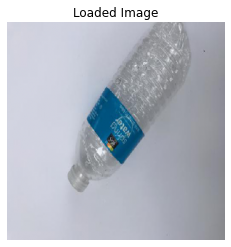

In [74]:
from tensorflow.keras.preprocessing import image

img_path = r'C:\Users\yooku\Desktop\FINALYEARPROJECT\input\Garbage classification\Garbage classification\plastic\plastic75.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

CARDBOARD : 0.38 %
GLASS : 6.28 %
METAL : 0.01 %
PAPER : 0.0 %
PLASTIC : 93.33 %
TRASH : 0.0 %


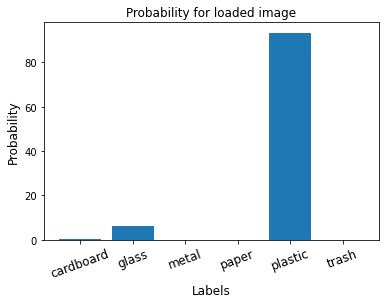

In [75]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()

1/1 [==============================] - 0s 32ms/step
Maximum Probability:  0.97026044
Classified: paper


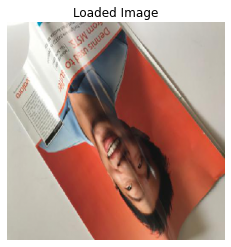

In [76]:
from tensorflow.keras.preprocessing import image

img_path = r'C:\Users\yooku\Desktop\FINALYEARPROJECT\input\Garbage classification\Garbage classification\paper\paper9.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

CARDBOARD : 0.57 %
GLASS : 0.28 %
METAL : 0.84 %
PAPER : 97.03 %
PLASTIC : 0.95 %
TRASH : 0.35 %


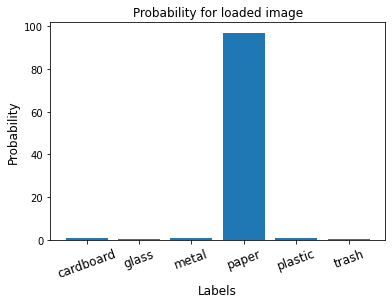

In [77]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()

1/1 [==============================] - 0s 31ms/step
Maximum Probability:  0.49341473
Classified: metal


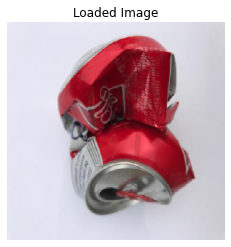

In [78]:
from tensorflow.keras.preprocessing import image

img_path = r'C:\Users\yooku\Desktop\FINALYEARPROJECT\input\Garbage classification\Garbage classification\metal\metal246.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

CARDBOARD : 0.44 %
GLASS : 47.85 %
METAL : 49.34 %
PAPER : 0.01 %
PLASTIC : 2.35 %
TRASH : 0.01 %


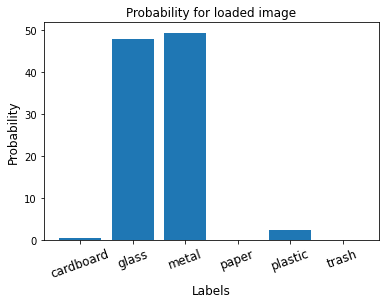

In [79]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()

1/1 [==============================] - 0s 31ms/step
Maximum Probability:  0.996469
Classified: glass


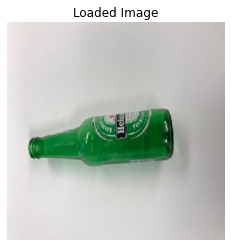

In [80]:
from tensorflow.keras.preprocessing import image

img_path = r'C:\Users\yooku\Desktop\FINALYEARPROJECT\input\Garbage classification\Garbage classification\glass\glass166.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

CARDBOARD : 0.0 %
GLASS : 99.65 %
METAL : 0.17 %
PAPER : 0.0 %
PLASTIC : 0.18 %
TRASH : 0.0 %


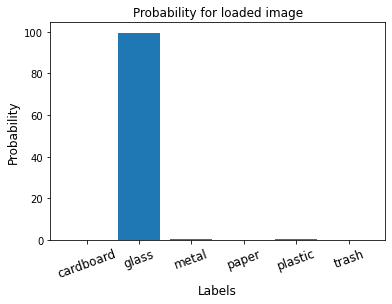

In [81]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()

1/1 [==============================] - 0s 37ms/step
Maximum Probability:  0.9999709
Classified: cardboard


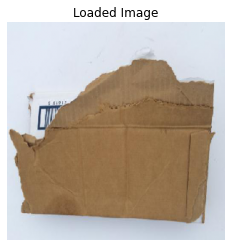

In [82]:
from tensorflow.keras.preprocessing import image

img_path = r'C:\Users\yooku\Desktop\FINALYEARPROJECT\input\Garbage classification\Garbage classification\cardboard\cardboard211.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

CARDBOARD : 100.0 %
GLASS : 0.0 %
METAL : 0.0 %
PAPER : 0.0 %
PLASTIC : 0.0 %
TRASH : 0.0 %


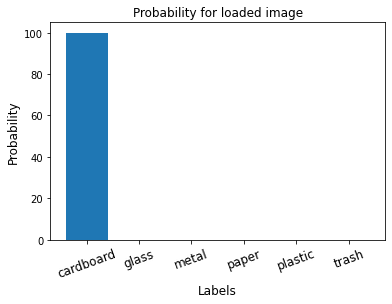

In [83]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()

1/1 [==============================] - 0s 240ms/step
Maximum Probability:  0.9866153
Classified: metal


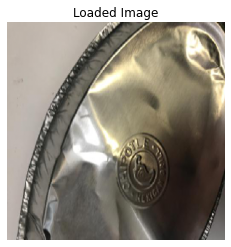

In [89]:
from tensorflow.keras.preprocessing import image

img_path = r'C:\Users\yooku\Desktop\FINALYEARPROJECT\input\Garbage classification\Garbage classification\metal\metal11.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

# Accuracy Graph

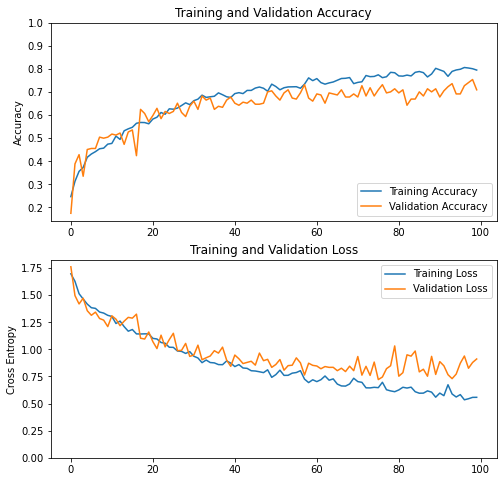

In [84]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

# Converting to TFLite

In [92]:
import tensorflow as tf
import keras
file = "Garbage.h5"
keras.models.save_model(model,file)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
open("garbage.tflite",'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\yooku\AppData\Local\Temp\tmpaafauhz4\assets


INFO:tensorflow:Assets written to: C:\Users\yooku\AppData\Local\Temp\tmpaafauhz4\assets


11380020

# Getting Files from Kernel

In [93]:
from IPython.display import FileLinks
FileLinks('.')

./
  Garbage Classification.ipynb
  Garbage.h5
  garbage.tflite
  labels.txt
  trained_model.h5
.\.ipynb_checkpoints/
  Garbage Classification-checkpoint.ipynb
.\input/
  one-indexed-files-notrash_test.txt
  one-indexed-files-notrash_train.txt
  one-indexed-files-notrash_val.txt
  one-indexed-files.txt
  zero-indexed-files.txt
.\input\Garbage classification\Garbage classification\cardboard/
  cardboard1.jpg
  cardboard10.jpg
  cardboard100.jpg
  cardboard101.jpg
  cardboard102.jpg
  cardboard103.jpg
  cardboard104.jpg
  cardboard105.jpg
  cardboard106.jpg
  cardboard107.jpg
  cardboard108.jpg
  cardboard109.jpg
  cardboard11.jpg
  cardboard110.jpg
  cardboard111.jpg
  cardboard112.jpg
  cardboard113.jpg
  cardboard114.jpg
  cardboard115.jpg
  cardboard116.jpg
  cardboard117.jpg
  cardboard118.jpg
  cardboard119.jpg
  cardboard12.jpg
  cardboard120.jpg
  cardboard121.jpg
  cardboard122.jpg
  cardboard123.jpg
  cardboard124.jpg
  cardboard125.jpg
  cardboard126.jpg
  cardboard127.jpg
  cardboard128.jpg
  cardboard129.jpg
  cardboard13.jpg
  cardboard130.jpg
  cardboard131.jpg
  cardboard132.jpg
  cardboard133.jpg
  cardboard134.jpg
  cardboard135.jpg
  cardboard136.jpg
  cardboard137.jpg
  cardboard138.jpg
  cardboard139.jpg
  cardboard14.jpg
  cardboard140.jpg
  cardboard141.jpg
  cardboard142.jpg
  cardboard143.jpg
  cardboard144.jpg
  cardboard145.jpg
  cardboard146.jpg
  cardboard147.jpg
  cardboard148.jpg
  cardboard149.jpg
  cardboard15.jpg
  cardboard150.jpg
  cardboard151.jpg
  cardboard152.jpg
  cardboard153.jpg
  cardboard154.jpg
  cardboard155.jpg
  cardboard156.jpg
  cardboard157.jpg
  cardboard158.jpg
  cardboard159.jpg
  cardboard16.jpg
  cardboard160.jpg
  cardboard161.jpg
  cardboard162.jpg
  cardboard163.jpg
  cardboard164.jpg
  cardboard165.jpg
  cardboard166.jpg
  cardboard167.jpg
  cardboard168.jpg
  cardboard169.jpg
  cardboard17.jpg
  cardboard170.jpg
  cardboard171.jpg
  cardboard172.jpg
  cardboard173.jpg
  cardboard174.jpg
  cardboard175.jpg
  cardboard176.jpg
  cardboard177.jpg
  cardboard178.jpg
  cardboard179.jpg
  cardboard18.jpg
  cardboard180.jpg
  cardboard181.jpg
  cardboard182.jpg
  cardboard183.jpg
  cardboard184.jpg
  cardboard185.jpg
  cardboard186.jpg
  cardboard187.jpg
  cardboard188.jpg
  cardboard189.jpg
  cardboard19.jpg
  cardboard190.jpg
  cardboard191.jpg
  cardboard192.jpg
  cardboard193.jpg
  cardboard194.jpg
  cardboard195.jpg
  cardboard196.jpg
  cardboard197.jpg
  cardboard198.jpg
  cardboard199.jpg
  cardboard2.jpg
  cardboard20.jpg
  cardboard200.jpg
  cardboard201.jpg
  cardboard202.jpg
  cardboard203.jpg
  cardboard204.jpg
  cardboard205.jpg
  cardboard206.jpg
  cardboard207.jpg
  cardboard208.jpg
  cardboard209.jpg
  cardboard21.jpg
  cardboard210.jpg
  cardboard211.jpg
  cardboard212.jpg
  cardboard213.jpg
  cardboard214.jpg
  cardboard215.jpg
  cardboard216.jpg
  cardboard217.jpg
  cardboard218.jpg
  cardboard219.jpg
  cardboard22.jpg
  cardboard220.jpg
  cardboard221.jpg
  cardboard222.jpg
  cardboard223.jpg
  cardboard224.jpg
  cardboard225.jpg
  cardboard226.jpg
  cardboard227.jpg
  cardboard228.jpg
  cardboard229.jpg
  cardboard23.jpg
  cardboard230.jpg
  cardboard231.jpg
  cardboard232.jpg
  cardboard233.jpg
  cardboard234.jpg
  cardboard235.jpg
  cardboard236.jpg
  cardboard237.jpg
  cardboard238.jpg
  cardboard239.jpg
  cardboard24.jpg
  cardboard240.jpg
  cardboard241.jpg
  cardboard242.jpg
  cardboard243.jpg
  cardboard244.jpg
  cardboard245.jpg
  cardboard246.jpg
  cardboard247.jpg
  cardboard248.jpg
  cardboard249.jpg
  cardboard25.jpg
  cardboard250.jpg
  cardboard251.jpg
  cardboard252.jpg
  cardboard253.jpg
  cardboard254.jpg
  cardboard255.jpg
  cardboard256.jpg
  cardboard257.jpg
  cardboard258.jpg
  cardboard259.jpg
  cardboard26.jpg
  cardboard260.jpg
  cardboard261.jpg
  cardboard262.jpg
  cardboard263.jpg
  cardboard264.jpg
  cardboard265.jpg
  cardboard266.jpg
  cardboard267.jpg
  cardboard268.jpg
  cardboard269.jpg
  cardboard27.jpg
  cardboard270.jpg